## DNN을 이용한 Eye diagram 예측방법
LHS를 이용하여 변수를 정한후 정한 변수로 뽑은 데이터를 이용하여 DNN을 실행한다.  
가장 기본적인 tensorflow DNN코드이다.  
실행하기위해 필요한 library들을 import시켜준다.
step3 부터 step 8까지 작성해주시면 됩니다.

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

/mnt/home/skhynix/.conda/envs/SK_week5/lib/python3.7/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
/mnt/home/skhynix/.conda/envs/SK_week5/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


### step0 
Cross validation matplotlob

W0730 16:15:19.177914 140039813900032 font_manager.py:1282] findfont: Font family ['AppleGothic'] not found. Falling back to DejaVu Sans.
W0730 16:15:19.186753 140039813900032 font_manager.py:1282] findfont: Font family ['AppleGothic'] not found. Falling back to DejaVu Sans.


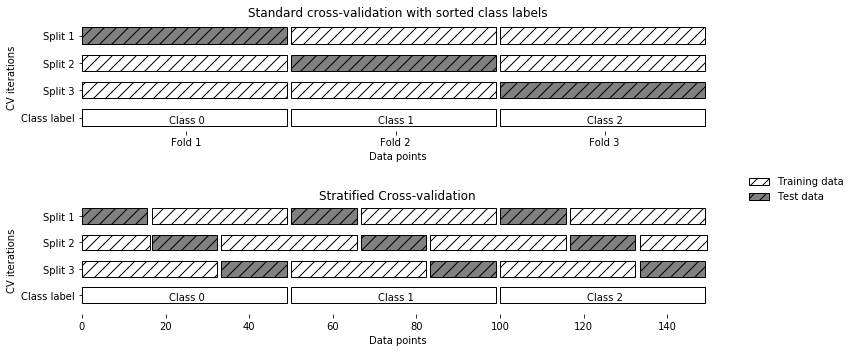

In [2]:
plt.rc('font', family='AppleGothic') # ÇÑ±ÛÃâ·Â
plt.rcParams['axes.unicode_minus']=False # Ãà -
mglearn.plots.plot_stratified_cross_validation()
plt.show()

### step1
변수를 정해준다. 최대 iteration 수, 첫layer의 hidden neuron의 수, 두번째 layer의 hidden neuron의 수

In [3]:
NUM_ITER =40000  # Number of iterations
nh = 10  # Number of hidden neurons
nh1 = 5
learning_rate = 1e-4  # Initial learning rate for gradient descent algorithm

### step2
입력과 출력 데이터를 가져온다.

In [4]:
x_data_temp=np.loadtxt('./DNN_data/x_data.csv',delimiter=',',unpack=True, dtype='float32')
x_data=np.transpose(x_data_temp)

y_data_temp=np.loadtxt('./DNN_data/y_data.csv',delimiter=',',unpack=True, dtype='float32')
y_data=np.transpose(y_data_temp)

### step3
tensorflow의 DNN을 구성하는 각 layer의 weight와 bias 변수를 지정하여준다.  
Weights and biases 2개의 hidden layer  
입력의 수는 5개(width, space, thickness, height_dielectric ,height_passivation)  

In [5]:
w1 = tf.get_variable("w1", shape=[5, nh], initializer=tf.contrib.layers.xavier_initializer())  # hidden layer1ÀÇ weight
b1 = tf.get_variable("b1", shape=[nh], initializer=tf.contrib.layers.xavier_initializer())  # hidden layer1ÀÇ bias
w2 = tf.get_variable("w2", shape=[nh, nh1], initializer=tf.contrib.layers.xavier_initializer())  # hidden layer2ÀÇ weight
b2 = tf.get_variable("b2", shape=[nh1], initializer=tf.contrib.layers.xavier_initializer())  # hidden layer2ÀÇ bias
wo = tf.get_variable("wo", shape=[nh1, 2], initializer=tf.contrib.layers.xavier_initializer())  # output layerÀÇ weight
bo = tf.get_variable("bo", shape=[2], initializer=tf.contrib.layers.xavier_initializer())  # output layerÀÇ bias

W0730 16:15:20.085526 140039813900032 lazy_loader.py:50] 
The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



### step4
입력과 출력데이터를 train,validation,test로 각각 나누어준다.  
x_train, x_test, y_train, y_test 8:2의 비율로

In [6]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.25)


### step5
placeholder함수를 이용하여 x_,y_ 정의한다.

In [7]:
x_ = tf.placeholder(tf.float32, shape=[None, len(x_train[0])]) #x_train[0]=5
y_ = tf.placeholder(tf.float32, shape=[None, len(y_train[0])]) #y_train[0]=2

### step6
각각의 layer에 Activation function 설정(DNN구성)

In [8]:
h = tf.nn.swish(tf.matmul(x_, w1) + b1)
h1 = tf.nn.sigmoid(tf.matmul(h, w2) + b2)  #sigmoid·Îº¯°æ
y_hat = tf.matmul(h1, wo) + bo


### step7
cross_entropy 와 train_step 를 설정한다. Adamoptimizer 이용

In [9]:
cross_entropy = tf.reduce_mean((y_ - y_hat) ** 2)  # cross entropyžŠ »ç¿ëÇÏ¿© weightžŠ update
train_step = tf.train.AdamOptimizer(learning_rate).minimize(cross_entropy)  # AdamoptimizeržŠ »ç¿ëÇÏ¿© ÃÖŒÒ°ªÀ» Ã£ŽÂŽÙ.

W0730 16:15:20.525863 140039813900032 deprecation.py:323] From /mnt/home/skhynix/.conda/envs/SK_week5/lib/python3.7/site-packages/tensorflow/python/ops/math_grad.py:1205: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


### step 8
accuracy와 accuracy_error 정의한다.

In [10]:
accuracy = tf.reduce_mean(abs(y_ - y_hat))  # Á€È®µµ°¡ žîÀÎÁö.
accuracy_error = tf.reduce_mean(abs((y_ - y_hat)/(y_hat)))*100 # Percent error·Î Æò°¡ 

### step 9 
run_train 을 정의하여 훈련하는곳에 사용한다.

In [11]:
def run_train(session, train_x, train_y):
    print("\nStart training")
    session.run(tf.global_variables_initializer()) #tf.initialize_all_variables()
    for i in range(NUM_ITER):
        train_step.run(feed_dict={x_: np.array(train_x), y_: np.array(train_y)})  # data와 y_train을 넣어 훈련
        if i % 1000 == 999:
            train_accuracy = accuracy.eval(feed_dict={x_: np.array(train_x), y_: train_y})
            print("|%d\t|%.4f\t|" % (i + 1, train_accuracy))  # 정확도 값을 출력해준다.
            
            # 원하는조건을 만족하면 for문 빠져나가도록 설정
            if train_accuracy < 0.001 :
                break;    

### step 10
cross_validate 을 정의하여 crossvalidtaion 하는데 사용함.

In [12]:
def cross_validate(session, split_size):
    results = []
    kf = KFold(n_splits=split_size)
    for train_idx, val_idx in kf.split(x_train, y_train):
        train_x = x_train[train_idx]
        train_y = y_train[train_idx]
        val_x = x_train[val_idx]
        val_y = y_train[val_idx]
        run_train(session, train_x, train_y)
        results.append(session.run(accuracy, feed_dict={x_: val_x, y_: val_y}))
    return results

### step 11
session을이용하여 crossvalidation을 이용하여 훈련실행


Start training
|1000	|0.3423	|
|2000	|0.1405	|
|3000	|0.0929	|
|4000	|0.0790	|
|5000	|0.0648	|
|6000	|0.0532	|
|7000	|0.0438	|
|8000	|0.0378	|
|9000	|0.0344	|
|10000	|0.0302	|
|11000	|0.0259	|
|12000	|0.0220	|
|13000	|0.0192	|
|14000	|0.0170	|
|15000	|0.0152	|
|16000	|0.0137	|
|17000	|0.0125	|
|18000	|0.0112	|
|19000	|0.0100	|
|20000	|0.0091	|
|21000	|0.0083	|
|22000	|0.0076	|
|23000	|0.0071	|
|24000	|0.0067	|
|25000	|0.0063	|
|26000	|0.0061	|
|27000	|0.0059	|
|28000	|0.0057	|
|29000	|0.0055	|
|30000	|0.0053	|
|31000	|0.0050	|
|32000	|0.0048	|
|33000	|0.0047	|
|34000	|0.0046	|
|35000	|0.0045	|
|36000	|0.0044	|
|37000	|0.0043	|
|38000	|0.0042	|
|39000	|0.0042	|
|40000	|0.0041	|

Start training
|1000	|1.0407	|
|2000	|0.5170	|
|3000	|0.2198	|
|4000	|0.0916	|
|5000	|0.0646	|
|6000	|0.0593	|
|7000	|0.0541	|
|8000	|0.0462	|
|9000	|0.0401	|
|10000	|0.0358	|
|11000	|0.0322	|
|12000	|0.0286	|
|13000	|0.0250	|
|14000	|0.0219	|
|15000	|0.0199	|
|16000	|0.0184	|
|17000	|0.0170	|
|18000	|0.0157	|


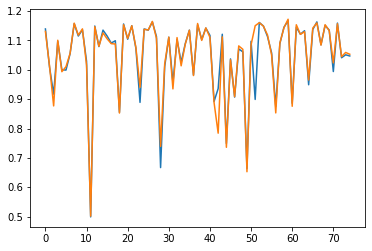

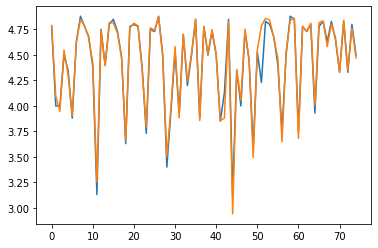

In [13]:
with tf.Session() as session: 
    result = cross_validate(session,5)
    print ("Cross-validation result: %s" % result)
    print ("Test accuracy: %f" % session.run(accuracy, feed_dict={x_: x_test, y_: y_test}))
    print ("TEST accuracy percent : %f" % session.run(accuracy_error, feed_dict={x_: x_test, y_: y_test}))
    
    deploy_ytest = session.run(y_hat, feed_dict={x_: x_test})

    saver = tf.train.Saver()
    saver.save(session, './Hynix_weight.ckpt')
    
    dataframe = pd.DataFrame(deploy_ytest)
    dataframe.to_csv("./deploy_ytest.csv",header=False,index=False)
    dataframe = pd.DataFrame(y_test)
    dataframe.to_csv("./y_test.csv",header=False,index=False)
    
    plt.figure(2)
    plt.plot(y_test[:,0])
    plt.plot(deploy_ytest[:,0])
    
    plt.figure(3)
    plt.plot(y_test[:,1]*5)
    plt.plot(deploy_ytest[:,1]*5)